<a href="https://colab.research.google.com/github/wai4uTAKER/HKTN/blob/main/osatom_final_for_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=551630e9d45c2726c2f1980a2b57b5430f1b4b1db86fce784f6067152340079e
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
!pip install markovify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 7.5 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18625 sha256=cddb3d9b283e2f462d60264c5c11871dd56fcecb5550d68af41598540b1e8b1f
  Stored in directory: /root/.cache/pip/wheels/76/0a/ab/8727d219981e57e6036316dd2ec2037e61ccea0c016f7ae0c1
Successfully built markovify


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pymorphy2
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import markovify
import csv 
import nltk
from tqdm import tqdm_notebook as tqdm

In [ ]:
data = pd.read_excel("/content/Массив для хакатона МИФИ.xlsx")

In [ ]:
data.columns =['title']

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('russian'))

In [ ]:
stop_words.add('который')
stop_words.add('это')

In [ ]:
data = data.dropna()
data = data.astype(str)

In [ ]:
lemmatizer = pymorphy2.MorphAnalyzer()
def preprocess(text):#pymorphy2
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.parse(token)[0].normal_form for token in tokens if len(token)>2]
    return tokens

In [ ]:
corpus = [preprocess(text) for text in tqdm(data['title']) if len(preprocess(text)) ]

<ipython-input-16-e52dc5aff732>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  corpus = [preprocess(text) for text in tqdm(data['title']) if len(preprocess(text)) ]


  0%|          | 0/1994 [00:00<?, ?it/s]

In [ ]:
dictionary = Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(text) for text in tqdm(corpus)]

<ipython-input-17-161cc663c0eb>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  corpus_bow = [dictionary.doc2bow(text) for text in tqdm(corpus)]


  0%|          | 0/1978 [00:00<?, ?it/s]

In [ ]:
num_cluster=10

In [ ]:
lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=num_cluster,passes = 50, random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           alpha='auto', iterations=100
                                   )

In [ ]:
 lda_model.print_topics()

[(0,
  '0.035*"каждый" + 0.023*"рабочий" + 0.021*"специалист" + 0.017*"место" + 0.015*"будущее" + 0.014*"польза" + 0.013*"источник" + 0.013*"момент" + 0.013*"делать" + 0.012*"быть"'),
 (1,
  '0.049*"цель" + 0.044*"работа" + 0.041*"росатом" + 0.025*"труд" + 0.023*"отрасль" + 0.022*"который" + 0.021*"сотрудник" + 0.018*"это" + 0.017*"свой" + 0.016*"больший"'),
 (2,
  '0.060*"новый" + 0.045*"рынок" + 0.040*"развитие" + 0.035*"международный" + 0.035*"продукт" + 0.031*"повышение" + 0.030*"создание" + 0.027*"проект" + 0.024*"технология" + 0.020*"мировой"'),
 (3,
  '0.028*"процесс" + 0.024*"снижение" + 0.017*"срок" + 0.017*"время" + 0.017*"вдохновлять" + 0.015*"передовой" + 0.013*"себестоимость" + 0.012*"протекание" + 0.011*"возможность" + 0.011*"организация"'),
 (4,
  '0.052*"предприятие" + 0.025*"внедрение" + 0.017*"госкорпорация" + 0.015*"инновационный" + 0.013*"выход" + 0.012*"иметь" + 0.011*"хотеть" + 0.011*"сам" + 0.011*"освоение" + 0.010*"шаг"'),
 (5,
  '0.023*"результат" + 0.019*"вопр

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    for i, row in tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_bow, texts=data['title'])
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

<ipython-input-23-e6eb44360686>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(ldamodel[corpus])):


0it [00:00, ?it/s]

<ipython-input-23-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-23-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [ ]:
df_dominant_topic[df_dominant_topic.Keywords.isna()].to_csv('fail_clustering.csv')

In [ ]:
df_dominant_topic=df_dominant_topic.dropna()

In [ ]:
df_dominant_topic.to_csv('clustering.csv')

In [ ]:

d = {}
for i in tqdm(range(num_cluster)):
    new_df=df_dominant_topic[df_dominant_topic.Dominant_Topic==i]
    z=new_df.Keywords.unique().tolist()
    out_str = " "
    out_str = out_str.join(z) 
    sz=out_str.split(', ')
    for j in range(len(sz)):
      d[sz[j]]=df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Keywords.value_counts()[0]


<ipython-input-29-6f8c6cd3d879>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_cluster)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
cake_mask = np.array(Image.open('/content/rosAt (1).jpg'))


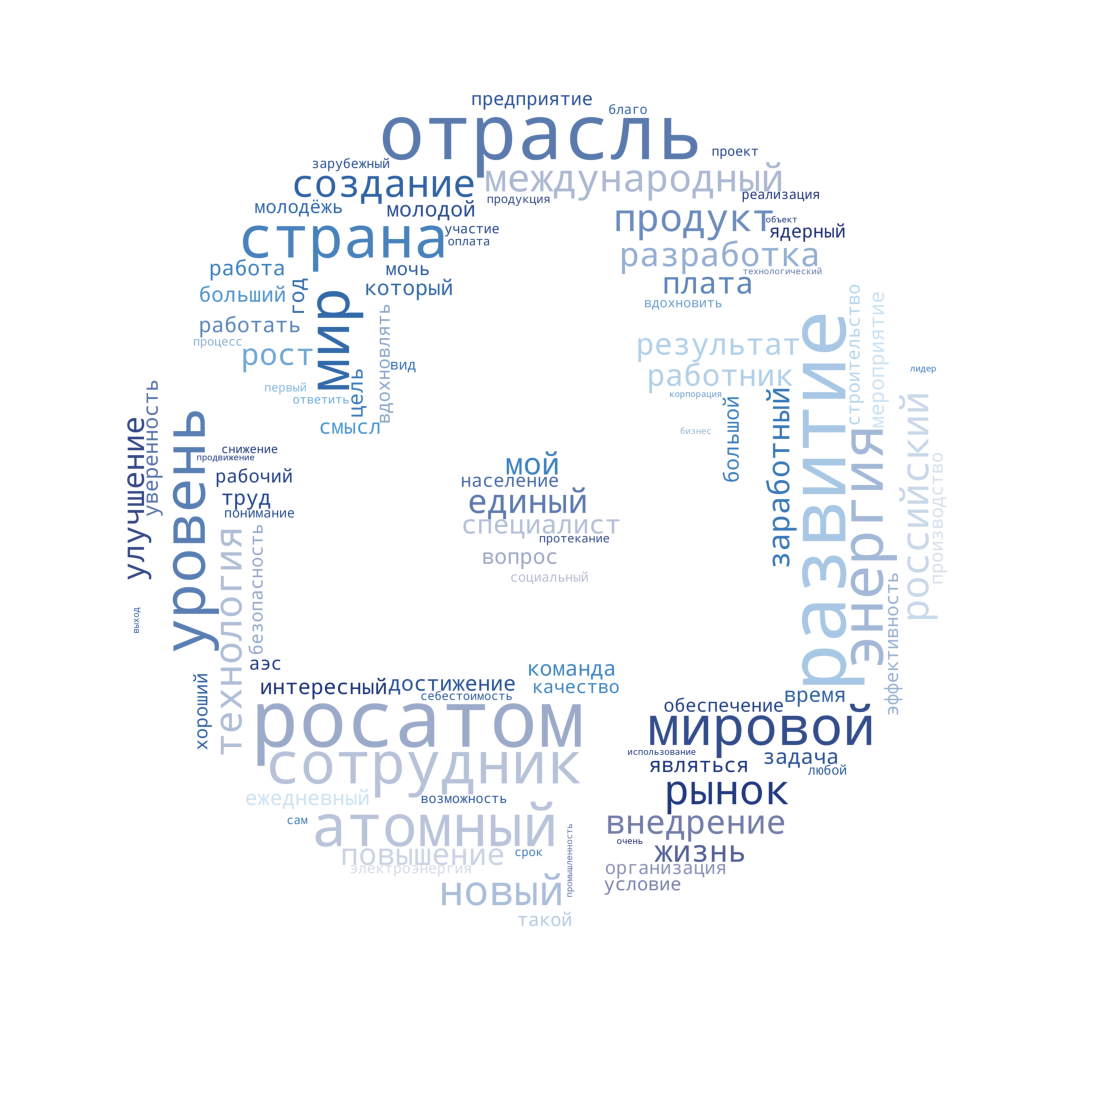

In [ ]:
cloud = WordCloud(stopwords=stop_words, mask=cake_mask, contour_color='#2e3043', background_color='white',mode="RGBA").generate_from_frequencies(d)
plt.figure(figsize=(16,14))
image_colors = ImageColorGenerator(cake_mask)
plt.imshow(cloud.recolor(color_func=image_colors))
plt.axis('off')
plt.savefig("rosat_cw.png", format="png")
plt.show()

In [ ]:
for i in tqdm(range(num_cluster)):  
  with open(f'cluster_{i}.txt', 'w') as f:
    ndarray = df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Text.values
    f.write(str(df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Keywords.unique()))
    f.write('\n')
    for row in ndarray:
        f.write(str(row))
        f.write('\n')

<ipython-input-33-508280cf9b2f>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_cluster)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
with open(f'model_answer.txt', 'w') as f_ans:
  for i in range(np.random.randint(num_cluster)):  
    with open(f'cluster_{i}.txt', 'r') as f:
      texta = f.read()
      text_model = markovify.Text(texta)
      txt_by_model = text_model.make_short_sentence(10000)
      if (txt_by_model is not None):
        f_ans.write(str(txt_by_model))
        f_ans.write('\n')